# Customer Profiling and Segmentation

In this lesson, we will be using the Recency, Frequency and Monetary value (revenue) information of customers to profile and segment them. Our choice of algorithm for this will be the K-Means clustering algorithm.

The K-Means clustering algorithm is a Machine Learning algorithm that attempts to split a given data set into a fixed number (K) of clusters. The following example image shows how an unsegmented dataset gets segmented using the K-Means clustering algorithm when the number of clusters are properly specified: 

<img src = "images/kmeans_clustering.png" width="500">

We will require the scikit-learn library to use the **K-Means Clustering algorithm**. You can install the library using the following command:

In [1]:
# !pip install scikit-learn

Now, let us start by importing the necessary libraries,

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

Next, importing the CSV file called `user_dataset.csv` which contains information about the recency, frequency and monetary value of customers.

In [3]:
# Read the CSV data as a Pandas DataFrame
user_df = pd.read_csv('data/user_dataset.csv')

In [4]:
# Looking at the first five rows
user_df.head()

,CustomerID,Recency,Frequency,Revenue
0,18074,373,13,489.60
1,13747,373,1,79.60
2,12791,373,2,192.60
3,17908,373,58,243.28
4,16583,373,14,233.45


In [5]:
# Printing the shape of the DataFrame
user_df.shape

(4372, 4)

Next, let us initiate the K-Means clustering algorithm with a total number of 4 clusters. 

Note that, there are different methods to determine how many clusters should be made in a dataset but we will not get into that for now.

In [6]:
# Build 4 clusters 
kmeans = KMeans(n_clusters=4)

### Segmenting Customers based on Recency

We will now fit the model object into the recency values in our dataframe.

In [7]:
# Fitting the model
kmeans.fit(user_df[['Recency']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Predicting the value of clusters and saving them as a new column `RecencyCluster` in the dataframe.

In [8]:
# Predicting clusters using the fitted model
user_df['RecencyCluster'] = kmeans.predict(user_df[['Recency']])

In [9]:
# Viewing the first five rows of the dataframe
user_df.head()

,CustomerID,Recency,Frequency,Revenue,RecencyCluster
0,18074,373,13,489.60,2
1,13747,373,1,79.60,2
2,12791,373,2,192.60,2
3,17908,373,58,243.28,2
4,16583,373,14,233.45,2


We have now segmented our customers based on **Recency** into 4 different clusters. Let us now see the distribution of data in the 4 clusters.

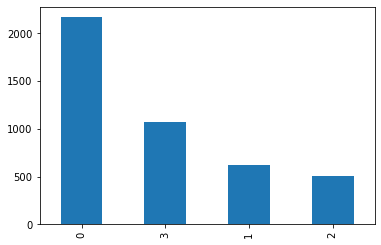

In [10]:
# Plotting the counts of data in each cluster
user_df['RecencyCluster'].value_counts().plot.bar()

We can see that the data has been distributed into different clusters namely 0, 1, 2, and 3. However, the K-Means Algorithm does not differentiate the ranking of clusters based on their order. We will hence order them based on their mean values.

In [11]:
# Create a new dataframe by grouping the dataframe based on different cluster values and find the mean
df_new = user_df.groupby("RecencyCluster")["Recency"].mean().reset_index()

In [12]:
# View the dataframe
df_new

,RecencyCluster,Recency
0,0,17.538533
1,1,189.451356
2,2,308.851779
3,3,79.278918


We will rename the second column name as `RecencyMean` to avoid confusion as it is the mean of all the recency values in each cluster.

In [13]:
# Renaming the column
df_new.rename(columns={"Recency": "RecencyMean"}, inplace=True)

Let us now sort the values in our dataframe in descending order of the value of `RecencyMean`. This is due to the fact that the cluster with the highest values of Recency should have the lowest score, i.e. 0.

**Note:** For Frequency and Revenue, we will be ordering the values in ascending order as their values are directly proportional to the score, i.e., a customer with a high frequency or revenue should have a high score.

In [14]:
# Sort the values
df_new = df_new.sort_values(by= "RecencyMean", ascending= False).reset_index(drop=True)
df_new

,RecencyCluster,RecencyMean
0,2,308.851779
1,1,189.451356
2,3,79.278918
3,0,17.538533


We now have the required value of scores for each of the cluster in the index of our dataframe. We will save them as a new column called `RecencyScore`.

In [15]:
# Create a new column called index with the index values
df_new['RecencyScore'] = df_new.index

We will now merge the original user dataframe `user_df` with the new dataframe to add the value of `RecencyScore` into our dataframe. 

In [16]:
# Create a final dataframe by merging our original dataframe and the new dataframe
df_user = pd.merge(user_df, df_new[["RecencyCluster",'RecencyScore']], on= "RecencyCluster")

# Remove the column for cluster
df_user.drop("RecencyCluster", axis= 1, inplace=True)

Lets see how our data looks like now.

In [17]:
# Looking at the first five rows
df_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyScore
0,18074,373,13,489.60,0
1,13747,373,1,79.60,0
2,12791,373,2,192.60,0
3,17908,373,58,243.28,0
4,16583,373,14,233.45,0


Let us also view some of the statistical metrics of the clusters.

In [18]:
# See details of each cluster
df_user.groupby('RecencyScore')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyScore,,,,,,,,
0,506.0,308.851779,39.144563,250.0,274.0,305.0,350.75,373.0
1,627.0,189.451356,32.948533,135.0,161.0,187.0,217.00,249.0
2,1072.0,79.278918,23.875838,49.0,59.0,73.0,95.00,134.0
3,2167.0,17.538533,13.320860,0.0,6.0,16.0,28.00,48.0


### Segmenting Customers based on Frequency

We will now fit the model object into the frequency values in our dataframe.

In [19]:
# Fitting the model
kmeans.fit(df_user[['Frequency']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Predicting the value of clusters and saving them as a new column `FrequencyCluster` in the dataframe.

In [20]:
# Predicting clusters using the fitted model
df_user['FrequencyCluster'] = kmeans.predict(df_user[['Frequency']])

We have now segmented our customers based on **Frequency** into 4 different clusters. Let us now see the distribution of data in the 4 clusters.

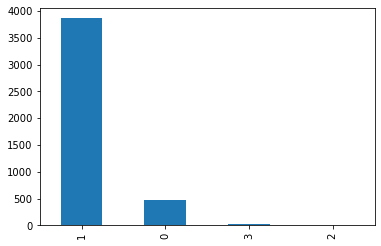

In [21]:
# Plotting the counts of data in each cluster
df_user['FrequencyCluster'].value_counts().plot.bar()

We can see that the data has been distributed into different clusters namely 0, 1, 2, and 3. However, the K-Means Algorithm does not differentiate the ranking of clusters based on their order. We will again order them using the function below.

In [22]:
# Ordering cluster numbers
def order_cluster(cluster_name, column_name, df, ascending):
    """
    Order clusters based on their mean values.
    """
    
    # Create a new dataframe by grouping the dataframe based on different cluster values and find the mean
    df_new = df.groupby(cluster_name)[column_name].mean().reset_index()
    
    # Sort the values
    df_new = df_new.sort_values(by=column_name,ascending=ascending).reset_index(drop=True)
    
    # Create a new column with the index values as Score
    new_column = column_name + "Score"
    df_new[new_column] = df_new.index
    
    # Create a final dataframe by merging our original dataframe and the new dataframe
    df_final = pd.merge(df,df_new[[cluster_name, new_column]], on=cluster_name)
    
    # Remove the column for cluster
    df_final.drop(cluster_name, axis= 1, inplace=True)
    
    return df_final

In [23]:
# Order the frequency cluster
df_user = order_cluster('FrequencyCluster', 'Frequency', df_user, True)

Lets see how our data looks like now.

In [24]:
# Looking at the first five rows
df_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyScore,FrequencyScore
0,18074,373,13,489.60,0,0
1,13747,373,1,79.60,0,0
2,12791,373,2,192.60,0,0
3,17908,373,58,243.28,0,0
4,16583,373,14,233.45,0,0


Let us also view some of the statistical metrics of the clusters.

In [25]:
# See details of each cluster
df_user.groupby('FrequencyScore')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyScore,,,,,,,,
0,3862.0,49.753755,44.812998,1.0,15.0,34.0,73.0,189.0
1,482.0,329.105809,132.667903,190.0,228.0,286.0,393.5,803.0
2,24.0,1349.750000,508.637759,872.0,1003.5,1156.0,1541.0,2782.0
3,4.0,5914.000000,1473.845537,4642.0,5006.5,5515.5,6423.0,7983.0


### Segmenting Customers based on Revenue

We will now fit the model object into the revenue values in our dataframe.

In [26]:
# Fitting the model
kmeans.fit(df_user[['Revenue']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Predicting the value of clusters and saving them as a new column `RevenueCluster` in the dataframe.

In [27]:
# Predicting clusters using the fitted model
df_user['RevenueCluster'] = kmeans.predict(df_user[['Revenue']])

We have now segmented our customers based on **Revenue** into 4 different clusters. Let us now see the distribution of data in the 4 clusters.

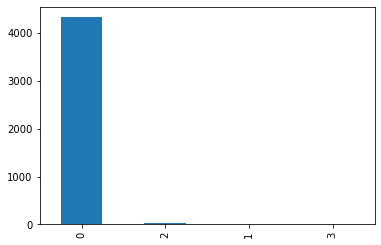

In [28]:
# Plotting the counts of data in each cluster
df_user['RevenueCluster'].value_counts().plot.bar()

We can see that the data has been distributed into different clusters namely 0, 1, 2, and 3. However, the K-Means Algorithm does not differentiate the ranking of clusters based on their order. We will again order them using the `order_cluster` function below.

In [29]:
# Order the cluster numbers
df_user = order_cluster('RevenueCluster', 'Revenue', df_user, True)

Lets see how our data looks like now.

In [30]:
# Looking at the first five rows
df_user.head()

,CustomerID,Recency,Frequency,Revenue,RecencyScore,FrequencyScore,RevenueScore
0,18074,373,13,489.60,0,0,0
1,13747,373,1,79.60,0,0,0
2,12791,373,2,192.60,0,0,0
3,17908,373,58,243.28,0,0,0
4,16583,373,14,233.45,0,0,0


Let us also view some of the statistical metrics of the clusters.

In [31]:
# Show details of the dataframe
df_user.groupby('RevenueScore')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueScore,,,,,,,,
0,4333.0,1463.977051,2287.153138,0.00,307.1600,669.140,1638.530,21834.77
1,30.0,47633.084667,18372.217546,26205.97,32635.0075,41268.655,61757.775,93999.38
2,6.0,144933.318333,33052.571335,111057.07,122557.2425,140235.405,154899.925,201619.41
3,3.0,293580.410000,38621.235867,262876.11,271899.5650,280923.020,308932.560,336942.10


Finally, we will combine all three values of scores to compute the **Overall RFM Score** of each of the customers.

In [32]:
# Calculate overall score
df_user['OverallRFMScore'] = df_user['RecencyScore'] + df_user['FrequencyScore'] + df_user['RevenueScore']

Let us see the range of our Overall RFM Score.

In [33]:
# Printing the unique elements
df_user['OverallRFMScore'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

We have 9 different scores for our data. Let us also see the data distribution in these scores.

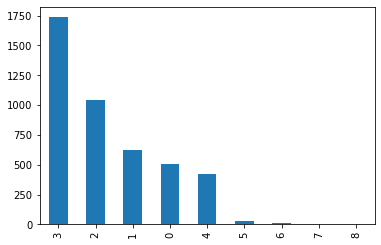

In [34]:
# Plotting a bar plot
df_user['OverallRFMScore'].value_counts().plot.bar()

Let us also see what the mean values of each Recency, Frequency, and Revenue are for the Overall Scores.

In [35]:
# Grouping by the OverallRFMScore column and getting the mean
df_user.groupby('OverallRFMScore')['Recency','Frequency','Revenue'].mean()

<ipython-input-35-ecc8028fae7d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_user.groupby('OverallRFMScore')['Recency','Frequency','Revenue'].mean()


,Recency,Frequency,Revenue
OverallRFMScore,,,
0,308.842942,22.314115,383.595129
1,190.030596,33.101449,623.840839
2,80.466859,46.728146,1244.159301
3,20.370392,71.068548,1442.966959
4,12.434272,329.495305,5796.577254
5,6.448276,880.620690,21600.481379
6,8.222222,1059.111111,119222.916667
7,2.600000,3921.200000,107493.924000
8,0.500000,3994.000000,218000.260000


The majority of data values seem to have a RFM Score of 3, followed by 2 and 1.

- A low RFM Score means that the customers have a low value of recency, are less frequent, and generate low revenue.  
- A high RFM score means that the customers have a high value of recency, are more frequent, and generate higher value of revenue to us. 

### Segmenting Customers based on Overall RFM Score

We will now segment the customers into three groups based on overall RFM score.

- Low-value
- Mid-value
- High-value

In [36]:
# Segment the customers based on overall score
df_user['Segment'] = 'Low-Value'
df_user.loc[df_user['OverallRFMScore']>2, 'Segment'] = 'Mid-Value' 
df_user.loc[df_user['OverallRFMScore']>4, 'Segment'] = 'High-Value' 

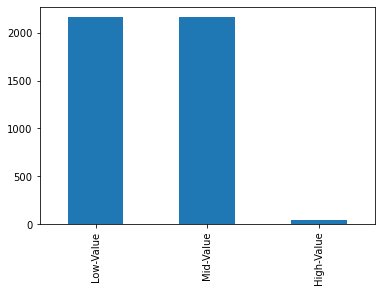

In [37]:
# Plotting a bar plot
df_user['Segment'].value_counts().plot.bar()

It can be seen that we have a large amount of low and mid-value customers but very less amount of high-value customers. This segmentation can help us determine the kind of strategies and approaches needed for improving sales and profit, which will allow us to increase the amount of high-value customers and their retention. 

Finally, let us plot the customer groups and view their segmentations visually.

#### Frequency vs Revenue

Text(0, 0.5, 'Revenue')

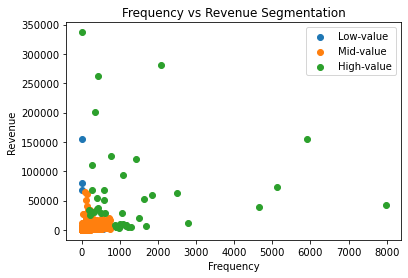

In [38]:
# Scatter plot for low-value
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Frequency'],
        y=df_user.query("Segment == 'Low-Value'")['Revenue'], label= "Low-value")

# Scatter plot for mid-value
plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Frequency'],
        y=df_user.query("Segment == 'Mid-Value'")['Revenue'], label= "Mid-value")

# Scatter plot for high-value
plt.scatter(x=df_user.query("Segment == 'High-Value'")['Frequency'],
        y=df_user.query("Segment == 'High-Value'")['Revenue'], label= "High-value")

# Making the plot easier to look at
plt.legend(loc="upper right")
plt.title("Frequency vs Revenue Segmentation")
plt.xlabel("Frequency")
plt.ylabel("Revenue")

#### Recency vs Revenue

Text(0, 0.5, 'Revenue')

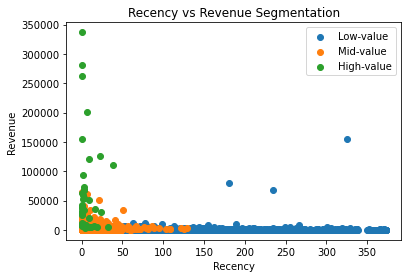

In [39]:
# Scatter plot for low-value
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Recency'],
        y=df_user.query("Segment == 'Low-Value'")['Revenue'], label= "Low-value")

# Scatter plot for mid-value
plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Recency'],
        y=df_user.query("Segment == 'Mid-Value'")['Revenue'], label= "Mid-value")

# Scatter plot for high-value
plt.scatter(x=df_user.query("Segment == 'High-Value'")['Recency'],
        y=df_user.query("Segment == 'High-Value'")['Revenue'], label= "High-value")

# Making the plot easier to look at
plt.legend(loc="upper right")
plt.title("Recency vs Revenue Segmentation")
plt.xlabel("Recency")
plt.ylabel("Revenue")

#### Recency vs Frequency


Text(0, 0.5, 'Frequency')

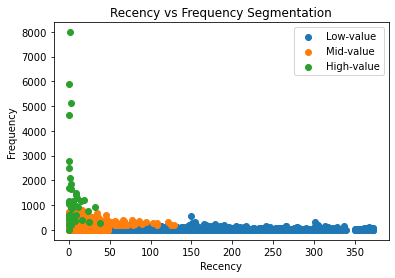

In [40]:
# Scatter plot for low-value
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Recency'],
        y=df_user.query("Segment == 'Low-Value'")['Frequency'], label= "Low-value")

# Scatter plot for mid-value
plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Recency'],
        y=df_user.query("Segment == 'Mid-Value'")['Frequency'], label= "Mid-value")

# Scatter plot for high-value
plt.scatter(x=df_user.query("Segment == 'High-Value'")['Recency'],
        y=df_user.query("Segment == 'High-Value'")['Frequency'], label= "High-value")

# Making the plot easier to look at
plt.legend(loc="upper right")
plt.title("Recency vs Frequency Segmentation")
plt.xlabel("Recency")
plt.ylabel("Frequency")

#### Revenue vs Frequency

Text(0, 0.5, 'Frequency')

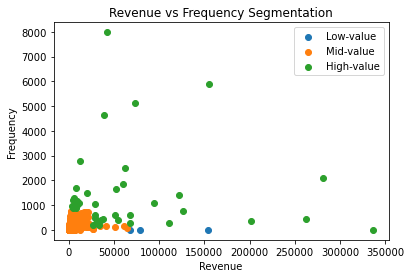

In [41]:
# Scatter plot for low-value
plt.scatter(x=df_user.query("Segment == 'Low-Value'")['Revenue'],
        y=df_user.query("Segment == 'Low-Value'")['Frequency'], label= "Low-value")

# Scatter plot for mid-value
plt.scatter(x=df_user.query("Segment == 'Mid-Value'")['Revenue'],
        y=df_user.query("Segment == 'Mid-Value'")['Frequency'], label= "Mid-value")

# Scatter plot for high-value
plt.scatter(x=df_user.query("Segment == 'High-Value'")['Revenue'],
        y=df_user.query("Segment == 'High-Value'")['Frequency'], label= "High-value")

# Making the plot easier to look at
plt.legend(loc="upper right")
plt.title("Revenue vs Frequency Segmentation")
plt.xlabel("Revenue")
plt.ylabel("Frequency")

Hence, we've successfully segmented our customers and these segments can now help us in various processes of building the business such as sales and marketing.